# Movie Recommendation System

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

sns.set_style('darkgrid')

In [6]:
## reading dataset 

df_movies = pd.read_csv(r'movies.csv')
df_rating = pd.read_csv(r'ratings.csv')

In [7]:
## displaying first 5 rows of movies dataset
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
## displaying last 5 rows of ratings dataset
df_rating.tail()

,userId,movieId,rating,timestamp
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898
105338,668,148626,4.5,1451148148


In [9]:
print("Movies data shape: ", df_movies.shape)
print("Ratings data shape: ", df_rating.shape)

Movies data shape:  (10329, 3)
Ratings data shape:  (105339, 4)


In [10]:
## checking null values in movies dataset
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
## checking null values in ratings dataset
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [12]:
df_movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Adventure|Romance|IMAX', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Children|Comedy',
       'Drama|Mystery', 'Drama|Thriller', 'Comedy|Crime',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller'

In [13]:
total_genres = []

for g in df_movies.genres:
    g = g.split('|') ## spliting every generes from '|'
    ## checking if the is not present in the list 
    if g not in total_genres:
        total_genres.append(g)

In [14]:
total_genres

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Children', 'Drama'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Thriller'],
 ['Mystery', 'Thriller'],
 ['Animation', 'Children', 'Drama', 'Musical', 'Romance'],
 ['Crime', 'Mystery', 'Thriller'],
 ['

In [15]:
df_movies.title.head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [16]:
df_movies.title[0][:-7]

'Toy Story'

In [17]:
year, title = [], []
for t in df_movies.title:
    title.append(t[:-7])
    year.append(t[-7:])

In [18]:
year[:5], title[:5]

([' (1995)', ' (1995)', ' (1995)', ' (1995)', ' (1995)'],
 ['Toy Story',
  'Jumanji',
  'Grumpier Old Men',
  'Waiting to Exhale',
  'Father of the Bride Part II'])

In [23]:
word_cloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                           ).generate(str(total_genres))

word_cloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2 
                        ).generate(str(title))

## Plotting Movies Genres

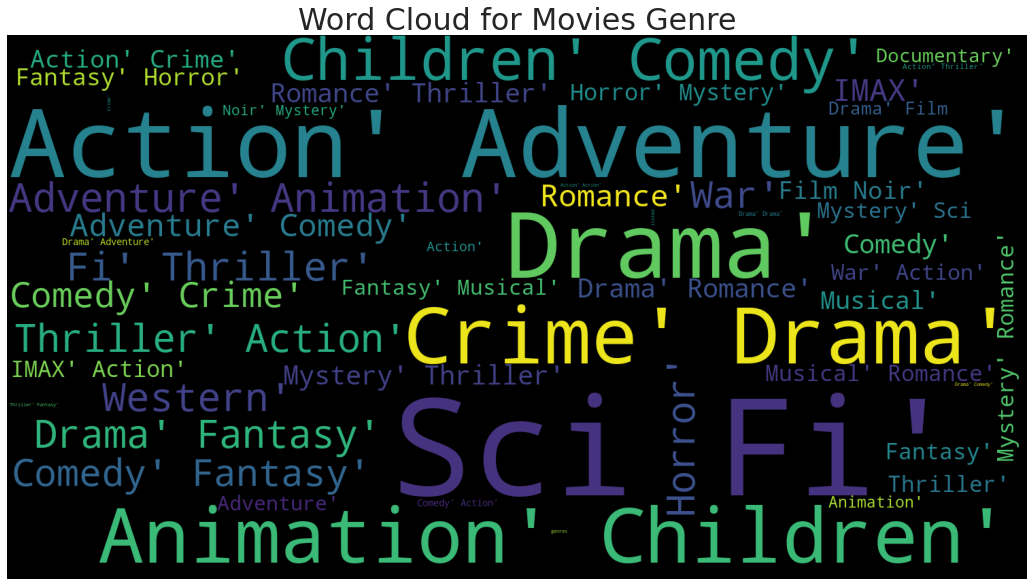

In [24]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Genre',fontsize=30)
plt.imshow(word_cloud_genre);

## Plotitng Movies Titles

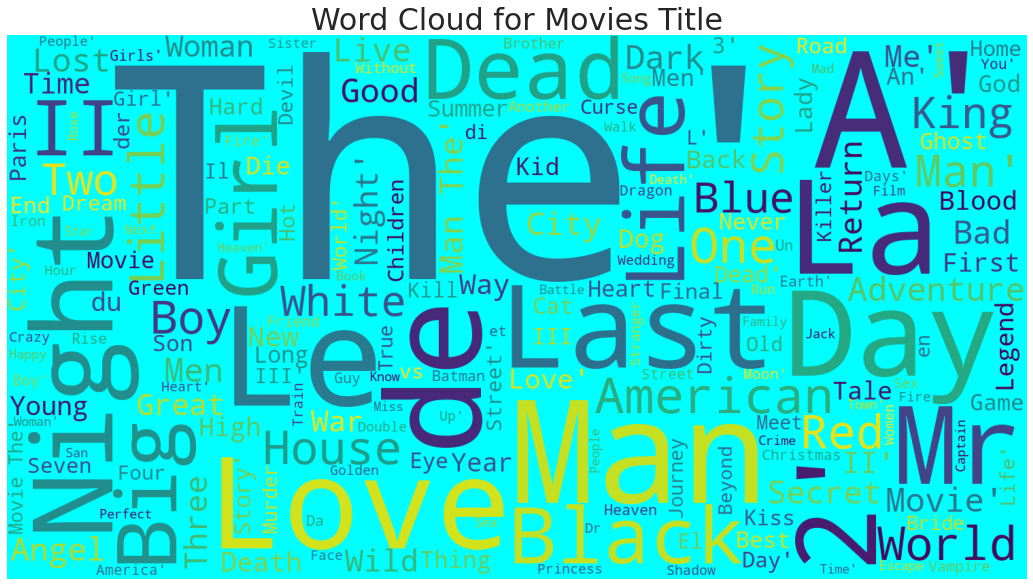

In [25]:
plt.figure(figsize=(20,10))
plt.axis('off')
plt.title('Word Cloud for Movies Title',fontsize=30)
plt.imshow(word_cloud_title);

## Merging both df_movies and df_rating dataset

In [26]:
final_df = pd.merge(df_rating, df_movies, how='left',on='movieId')

In [27]:
final_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [28]:
title_rating = final_df.groupby(['title'])[['rating']].sum()
title_rating = title_rating.nlargest(10,'rating')
title_rating.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


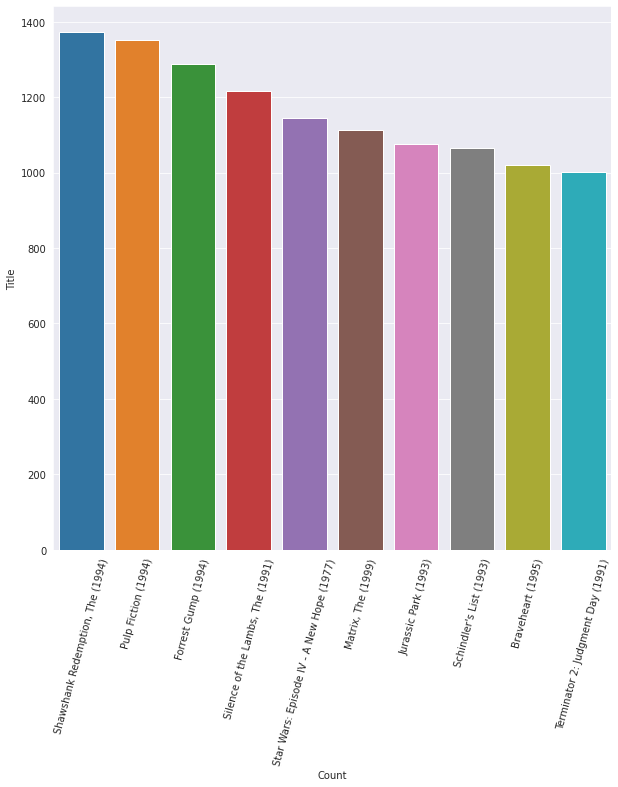

In [29]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=75);
sns.barplot(title_rating.index, title_rating['rating']);
plt.ylabel('Title');
plt.xlabel('Count');

In [30]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_movies['genres'])

In [31]:
movie_user = final_df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),10 Items or Less (2006),10 Things I Hate About You (1999),10 to Midnight (1983),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)",11-11-11 (11-11-11: The Prophecy) (2011),11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010),12:01 (1993),13 (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Rue Madeleine (1947),"13th Warrior, The (1999)",1408 (2007),1492: Conquest of Paradise (1992),15 Minutes (2001),...,Yves Saint Laurent (2014),Z (1969),Zabriskie Point (1970),Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zandalee (1991),Zapped! (1982),Zardoz (1974),Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zebraman (2004),Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Day (2002),Zero Effect (1998),Zodiac (2007),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),Zookeeper (2011),Zoolander (2001),Zorba the Greek (Alexis Zorbas) (1964),"Zorro, the Gay Blade (1981)",Zozo (2005),Zu: Warriors from the Magic Mountain (Xin shu shan jian ke) (1983),Zulu (1964),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
cos_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

In [33]:
indices=pd.Series(df_movies.index,index=df_movies['title'])

titles=df_movies['title']

def recom_sys(title):
    idx = indices[title]
    similarity_scores = list(enumerate(cos_similarity[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:21]
    movie_indices = [i[0] for i in similarity_scores]
    return titles.iloc[movie_indices]

In [34]:
recom_sys('Grumpier Old Men (1995)')

6                          Sabrina (1995)
36                        Clueless (1995)
59                   Two if by Sea (1996)
62     French Twist (Gazon maudit) (1995)
106                   If Lucy Fell (1996)
108                      Boomerang (1992)
113                 Pie in the Sky (1996)
155                       Mallrats (1995)
161                    Nine Months (1995)
208                   Forget Paris (1995)
222                           I.Q. (1994)
245                     Milk Money (1994)
254                       Only You (1994)
259              Perez Family, The (1995)
299        While You Were Sleeping (1995)
317    Four Weddings and a Funeral (1994)
337                     Speechless (1994)
365                      Barcelona (1994)
388                           Dave (1993)
392    Even Cowgirls Get the Blues (1993)
Name: title, dtype: object

In [35]:
titles

0                           Toy Story (1995)
1                             Jumanji (1995)
2                    Grumpier Old Men (1995)
3                   Waiting to Exhale (1995)
4         Father of the Bride Part II (1995)
                        ...                 
10324          Cosmic Scrat-tastrophe (2015)
10325             Le Grand Restaurant (1966)
10326         A Very Murray Christmas (2015)
10327                   The Big Short (2015)
10328    Marco Polo: One Hundred Eyes (2015)
Name: title, Length: 10329, dtype: object